<a href="https://colab.research.google.com/github/fulasho/Predictive-Analytics/blob/main/Housing_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

**Load and Explore the dataset**

In [2]:
Housing_price = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/housing_prices.csv')

In [3]:
Housing_price.head()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,36200.0


In [4]:
Housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crime_rate             506 non-null    float64
 1   big_lots_percent       506 non-null    float64
 2   office_percent         506 non-null    float64
 3   charles_river          506 non-null    float64
 4   nitrous                506 non-null    float64
 5   avg_num_rooms          506 non-null    float64
 6   pre_1940               506 non-null    float64
 7   distance_to_city       506 non-null    float64
 8   highway_access         506 non-null    float64
 9   tax_rate               506 non-null    float64
 10  student_teacher_ratio  506 non-null    float64
 11  median_price           506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [5]:
Housing_price.isnull().sum()

crime_rate               0
big_lots_percent         0
office_percent           0
charles_river            0
nitrous                  0
avg_num_rooms            0
pre_1940                 0
distance_to_city         0
highway_access           0
tax_rate                 0
student_teacher_ratio    0
median_price             0
dtype: int64

In [6]:
Housing_price.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

*After loadindg and inspecting the dataset we can say that it doesnt have any null or duplicated values. This dataset is clean and good to go for analysis.*

In [7]:
Housing_price.describe()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22532.806324
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5000.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17025.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21200.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50000.000000


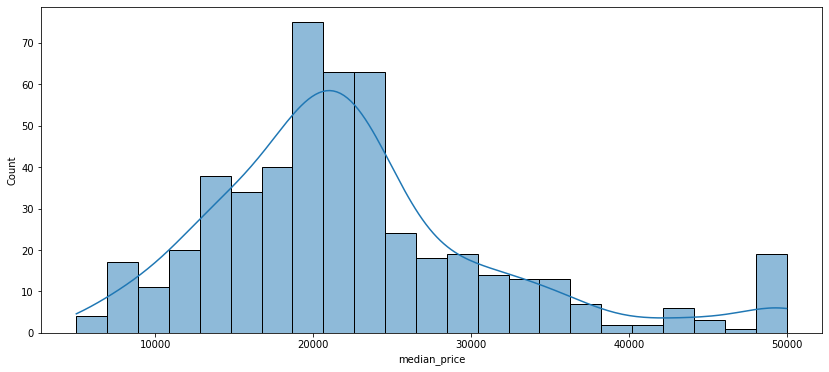

In [8]:
plt.figure(figsize=(14, 6))
sns.histplot(Housing_price['median_price'], kde=True);

**Correlation Matrix**

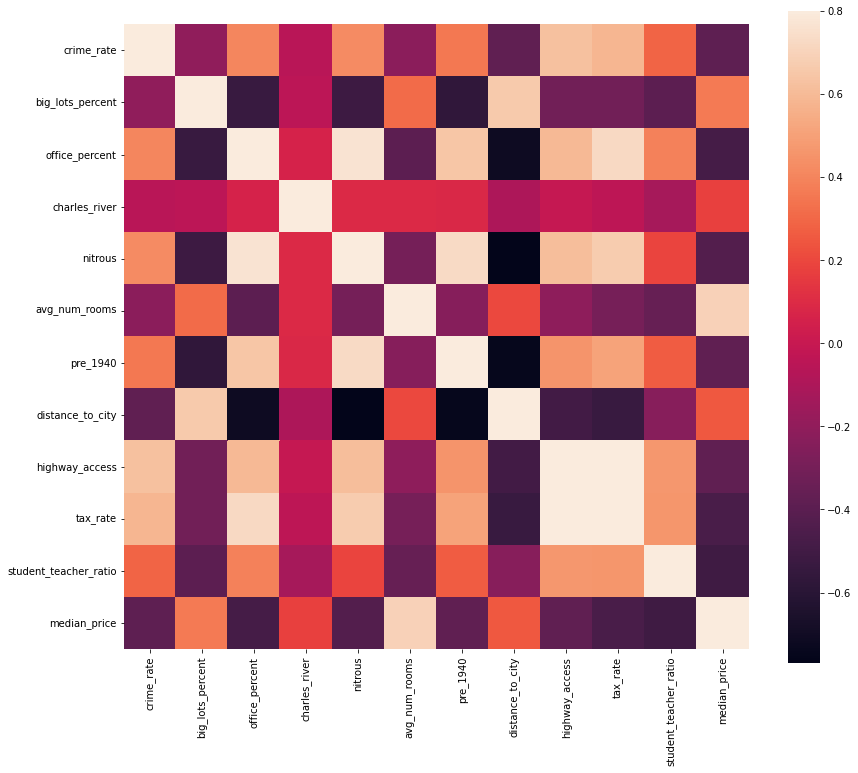

In [9]:
plt.figure(figsize=(14,12))
corrmat = Housing_price.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

**Median Price Correlation Matrix**

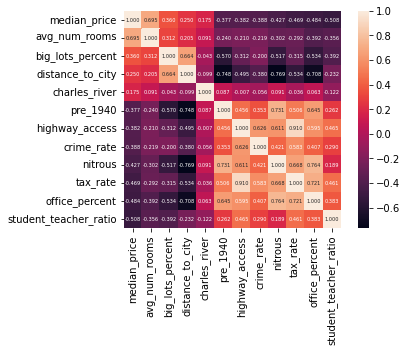

In [10]:
cols = corrmat.nlargest(12, 'median_price')['median_price'].index
cm = np.corrcoef(Housing_price[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)

*The most correlated variables with median_price are:*



*   avg_num_rooms
*   big_lots_percent
*   distance_to_city
*   highway_access
*   crime_rate
*   tax_rate







*Now Let drop the others elements*

In [11]:
Housing_price.drop(['charles_river', 'pre_1940', 'nitrous', 'student_teacher_ratio','office_percent'], axis=1, inplace=True)

**Scatter plots between median_price and correlated variables**

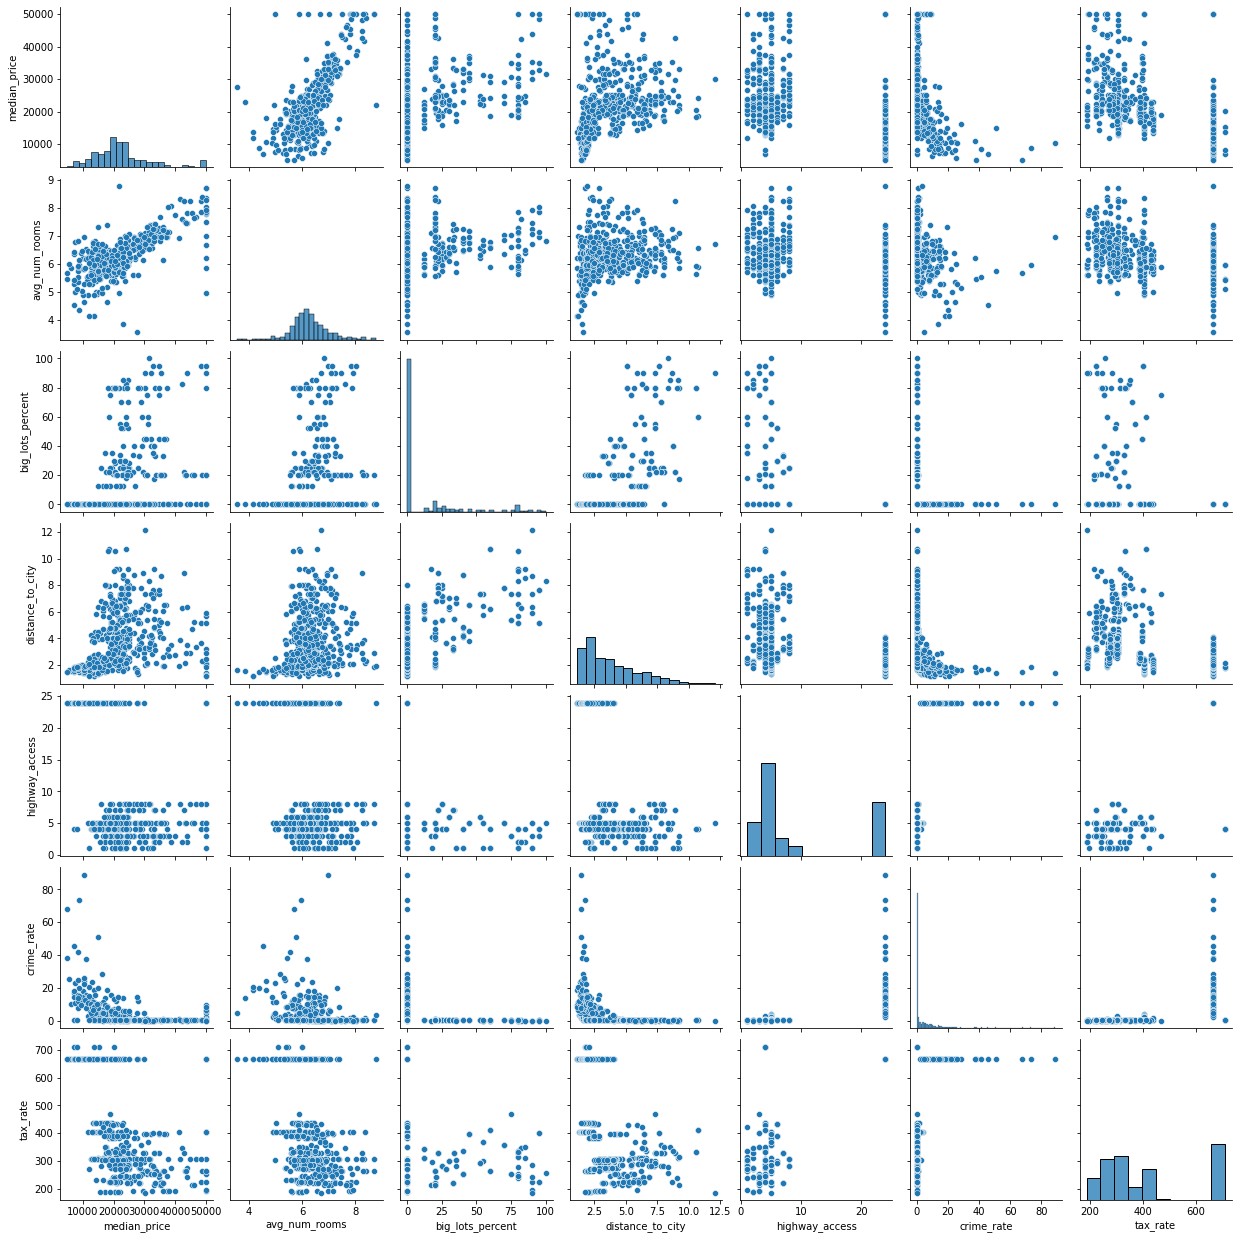

In [12]:
cols = ['median_price', 'avg_num_rooms', 'big_lots_percent', 'distance_to_city', 'highway_access', 'crime_rate', 'tax_rate']
sns.pairplot(Housing_price[cols])

*Dependent values*

In [13]:
y= Housing_price.iloc[:,6].values
Housing_price.drop(labels=['median_price'],axis=1,inplace=True)

*Independent* values

In [14]:
x=Housing_price.iloc[:,:].values

**Let Train the model(Randam Forest)**

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [17]:
# Model Prediction
y_pred=model.predict(x_test)

In [18]:
#Model Accuracy
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

65.38273760981963